<a href="https://colab.research.google.com/github/testarossa26/e-commerce/blob/main/Ph%C3%A2n_lo%E1%BA%A1i_h%E1%BB%8Dc_sinh_s%E1%BB%AD_d%E1%BB%A5ng_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Đọc tệp CSV
df = pd.read_csv('student_data.csv')

df.head()

,Họ tên,Mã sinh viên,Đã có,Giới tính,Lớp chuyên ngành,GPA hiện tại,Điểm thực hành,Điểm trung bình kiểm tra,Điểm chuyên cần,Thời gian tự học (giờ/ngày),Tỷ lệ hoàn thành bài tập (%),Kết quả học tập,Chuyên ngành,Unnamed: 13,Unnamed: 14
0,Nguyễn Ngọc Anh,B21DCCN153,NaN,Nam,D21CNPM5,3.99,10,10.0,10,2.0,100.0,Giỏi,CNPM,NaN,145.0
1,Đào Quang Tùng,B21DCCN764,NaN,Nam,D21CNPM4,3.41,9,9.0,9,3.0,100.0,Giỏi,CNPM,NaN,154.0
2,Nguyễn Việt Hưng,B21DCCN425,NaN,Nam,D21HTTT1,3.60,8,8.0,10,2.0,82.0,Giỏi,HTTT,NaN,NaN
3,Nguyễn Vinh Hiển,B21DCCN047,NaN,Nam,D21HTTT2,3.35,8,8.0,5,2.0,87.0,Giỏi,HTTT,NaN,NaN
4,Phạm Quang Hà,B21DCCN314,NaN,Nam,D21HTTT3,3.40,8,7.0,9,1.0,81.0,Giỏi,HTTT,NaN,NaN



#Tiền xử lý dữ liệu

In [ ]:
# loại bỏ các feature có dữ liệu trống
df.drop('Đã có', axis=1, inplace=True)
# loại bỏ các sample có dữ liệu trống
df.dropna(inplace=True)

df

,Họ tên,Mã sinh viên,Giới tính,Lớp chuyên ngành,GPA hiện tại,Điểm thực hành,Điểm trung bình kiểm tra,Điểm chuyên cần,Thời gian tự học (giờ/ngày),Tỷ lệ hoàn thành bài tập (%),Kết quả học tập
0,Nguyễn Ngọc Anh,B21DCCN153,Nam,D21CNPM5,3.99,10.0,10.0,10.0,2.0,100.0,Giỏi
1,Đào Quang Tùng,B21DCCN764,Nam,D21CNPM4,3.41,9.0,9.0,9.0,3.0,100.0,Giỏi
2,Nguyễn Việt Hưng,B21DCCN425,Nam,D21HTTT1,3.60,8.0,8.0,10.0,2.0,82.0,Giỏi
3,Nguyễn Vinh Hiển,B21DCCN047,Nam,D21HTTT2,3.35,8.0,8.0,5.0,2.0,87.0,Giỏi
4,Phạm Quang Hà,B21DCCN314,Nam,D21HTTT3,3.40,8.0,7.0,9.0,1.0,81.0,Giỏi
...,...,...,...,...,...,...,...,...,...,...,...
294,Đỗ Đức Hồng Phúc,B20DCCN505,Nam,D21CNPM1,2.20,3.0,4.0,5.0,1.5,55.0,Yếu
295,Nguyễn Mai Phương,B21DCCN601,Nữ,D21CNPM1,2.30,4.0,5.0,5.0,2.0,58.0,Yếu
296,Lê Gia Quang,B21DCCN625,Nam,D21CNPM1,2.10,4.0,4.3,4.0,1.5,52.0,Yếu
297,Nguyễn Văn Quý,B21DCCN637,Nam,D21CNPM1,2.70,5.0,6.2,7.0,3.0,73.0,Trung bình


In [ ]:
# Kiểm tra số lượng giá trị bị thiếu trong mỗi cột
print(df.isna().sum())

Họ tên                          0
Mã sinh viên                    0
Giới tính                       0
Lớp chuyên ngành                0
GPA hiện tại                    0
Điểm thực hành                  0
Điểm trung bình kiểm tra        0
Điểm chuyên cần                 0
Thời gian tự học (giờ/ngày)     0
Tỷ lệ hoàn thành bài tập (%)    0
Kết quả học tập                 0
dtype: int64


In [ ]:
df.head()

,Họ tên,Mã sinh viên,Giới tính,Lớp chuyên ngành,GPA hiện tại,Điểm thực hành,Điểm trung bình kiểm tra,Điểm chuyên cần,Thời gian tự học (giờ/ngày),Tỷ lệ hoàn thành bài tập (%),Kết quả học tập
0,Nguyễn Ngọc Anh,B21DCCN153,Nam,D21CNPM5,3.99,10.0,10.0,10.0,2.0,100.0,Giỏi
1,Đào Quang Tùng,B21DCCN764,Nam,D21CNPM4,3.41,9.0,9.0,9.0,3.0,100.0,Giỏi
2,Nguyễn Việt Hưng,B21DCCN425,Nam,D21HTTT1,3.60,8.0,8.0,10.0,2.0,82.0,Giỏi
3,Nguyễn Vinh Hiển,B21DCCN047,Nam,D21HTTT2,3.35,8.0,8.0,5.0,2.0,87.0,Giỏi
4,Phạm Quang Hà,B21DCCN314,Nam,D21HTTT3,3.40,8.0,7.0,9.0,1.0,81.0,Giỏi


In [ ]:
# Thêm cột Chuyên ngành từ Lớp chuyên ngành
df['Chuyên ngành'] = df['Lớp chuyên ngành'].str[3:7]

# Chuyển đổi Giới tính và Chuyên ngành thành dạng số để mô hình sử dụng
df['Giới tính'] = df['Giới tính'].map({'Nam': 1, 'Nữ': 0})
df['Chuyên ngành'] = df['Chuyên ngành'].map({'CNPM': 1, 'HTTT': 0})
df.head()

,Họ tên,Mã sinh viên,Giới tính,Lớp chuyên ngành,GPA hiện tại,Điểm thực hành,Điểm trung bình kiểm tra,Điểm chuyên cần,Thời gian tự học (giờ/ngày),Tỷ lệ hoàn thành bài tập (%),Kết quả học tập,Chuyên ngành
0,Nguyễn Ngọc Anh,B21DCCN153,1,D21CNPM5,3.99,10.0,10.0,10.0,2.0,100.0,Giỏi,1
1,Đào Quang Tùng,B21DCCN764,1,D21CNPM4,3.41,9.0,9.0,9.0,3.0,100.0,Giỏi,1
2,Nguyễn Việt Hưng,B21DCCN425,1,D21HTTT1,3.60,8.0,8.0,10.0,2.0,82.0,Giỏi,0
3,Nguyễn Vinh Hiển,B21DCCN047,1,D21HTTT2,3.35,8.0,8.0,5.0,2.0,87.0,Giỏi,0
4,Phạm Quang Hà,B21DCCN314,1,D21HTTT3,3.40,8.0,7.0,9.0,1.0,81.0,Giỏi,0


# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Thông tin tổng quát về cấu trúc của data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Họ tên                        299 non-null    object 
 1   Mã sinh viên                  299 non-null    object 
 2   Giới tính                     299 non-null    int64  
 3   Lớp chuyên ngành              299 non-null    object 
 4   GPA hiện tại                  299 non-null    float64
 5   Điểm thực hành                299 non-null    float64
 6   Điểm trung bình kiểm tra      299 non-null    float64
 7   Điểm chuyên cần               299 non-null    float64
 8   Thời gian tự học (giờ/ngày)   299 non-null    float64
 9   Tỷ lệ hoàn thành bài tập (%)  299 non-null    float64
 10  Kết quả học tập               299 non-null    object 
 11  Chuyên ngành                  299 non-null    int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 30.4+ KB


In [ ]:
#Tóm tắt thống kê các giá trị số trong data: số lượng, trung bình, độ lệch chuẩn, min, max, q1, q2 (Trung vị), q3
df.describe()

,Giới tính,GPA hiện tại,Điểm thực hành,Điểm trung bình kiểm tra,Điểm chuyên cần,Thời gian tự học (giờ/ngày),Tỷ lệ hoàn thành bài tập (%),Chuyên ngành
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.896321,2.870100,5.989967,5.864548,5.983278,2.526756,65.120736,0.484950
std,0.305355,0.529899,2.189795,1.988393,2.412855,1.382763,18.966381,0.500611
min,0.000000,1.500000,1.000000,1.500000,1.000000,0.000000,18.000000,0.000000
25%,1.000000,2.500000,4.000000,4.500000,4.000000,1.500000,52.000000,0.000000
50%,1.000000,2.850000,6.000000,5.700000,6.000000,2.000000,65.000000,0.000000
75%,1.000000,3.275000,8.000000,7.400000,8.000000,3.000000,80.000000,1.000000
max,1.000000,3.990000,10.000000,10.000000,10.000000,7.000000,100.000000,1.000000


Số lượng từng giới tính:
Giới tính
1    268
0     31


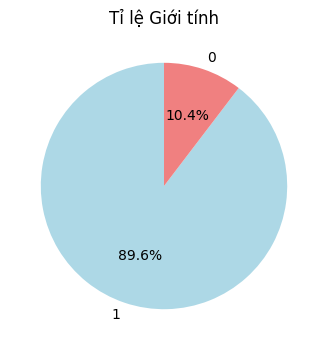

In [ ]:
# Phân tích số lượng từng giới tính
gender_counts = df['Giới tính'].value_counts()

# In ra số lượng từng giới tính
print("Số lượng từng giới tính:")
print(gender_counts.to_string(index=True))

# Vẽ biểu đồ tròn
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Tỉ lệ Giới tính')
plt.show()

Số lượng từng chuyên ngành:
Chuyên ngành
0    154
1    145


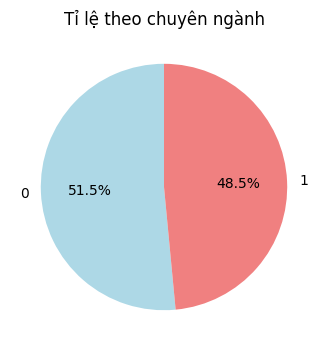

In [ ]:
# Phân tích số lượng theo chuyên ngành
gender_counts = df['Chuyên ngành'].value_counts()

# In ra số lượng từng giới tính
print("Số lượng từng chuyên ngành:")
print(gender_counts.to_string(index=True))

# Vẽ biểu đồ tròn
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Tỉ lệ theo chuyên ngành')
plt.show()

count    299.000000
mean       2.870100
std        0.529899
min        1.500000
25%        2.500000
50%        2.850000
75%        3.275000
max        3.990000
Name: GPA hiện tại, dtype: float64


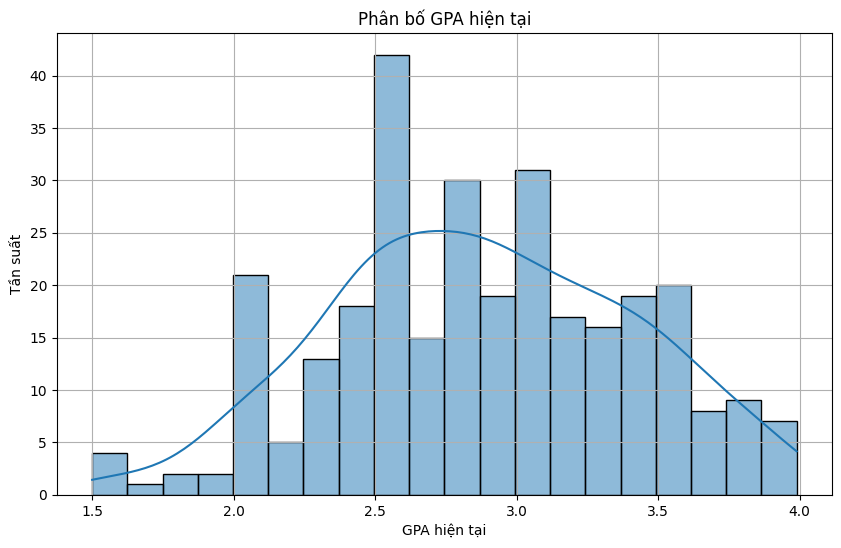

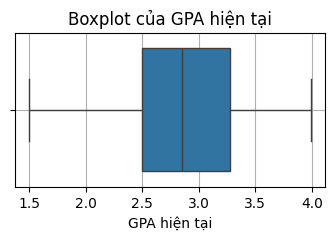

In [ ]:
# Tóm tắt thống kê cho cột 'GPA hiện tại'
print(df['GPA hiện tại'].describe())

# Vẽ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['GPA hiện tại'], bins=20, kde=True)  # KDE cho đường cong mật độ
plt.title('Phân bố GPA hiện tại')
plt.xlabel('GPA hiện tại')
plt.ylabel('Tần suất')
plt.grid()
plt.show()

# Vẽ boxplot
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['GPA hiện tại'])
plt.title('Boxplot của GPA hiện tại')
plt.xlabel('GPA hiện tại')
plt.grid()
plt.show()

count    299.000000
mean       5.989967
std        2.189795
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Điểm thực hành, dtype: float64


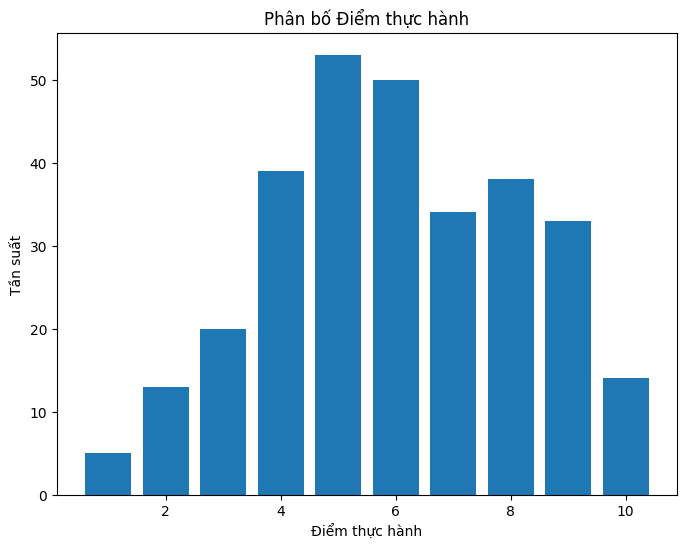

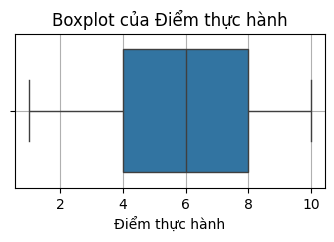

In [ ]:
# Tóm tắt thống kê cho cột 'Điểm thực hành'
gpa_summary = df['Điểm thực hành'].describe()
print(gpa_summary)

# Vẽ histogram
counts = df['Điểm thực hành'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts)
plt.title('Phân bố Điểm thực hành')
plt.xlabel('Điểm thực hành')
plt.ylabel('Tần suất')
plt.show()

# Vẽ boxplot
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['Điểm thực hành'])
plt.title('Boxplot của Điểm thực hành')
plt.xlabel('Điểm thực hành')
plt.grid()
plt.show()

count    299.000000
mean       5.864548
std        1.988393
min        1.500000
25%        4.500000
50%        5.700000
75%        7.400000
max       10.000000
Name: Điểm trung bình kiểm tra, dtype: float64


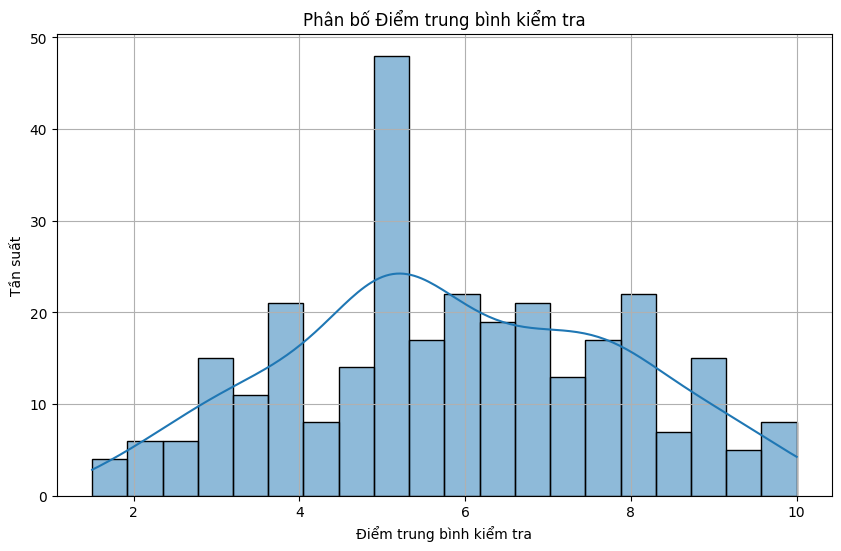

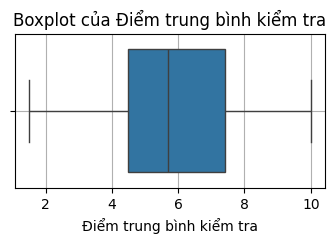

In [ ]:
# Tóm tắt thống kê cho cột 'Điểm trung bình kiểm tra'
print(df['Điểm trung bình kiểm tra'].describe())

# Vẽ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Điểm trung bình kiểm tra'], bins=20, kde=True)  # KDE cho đường cong mật độ
plt.title('Phân bố Điểm trung bình kiểm tra')
plt.xlabel('Điểm trung bình kiểm tra')
plt.ylabel('Tần suất')
plt.grid()
plt.show()

# Vẽ boxplot
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['Điểm trung bình kiểm tra'])
plt.title('Boxplot của Điểm trung bình kiểm tra')
plt.xlabel('Điểm trung bình kiểm tra')
plt.grid()
plt.show()

count    299.000000
mean       5.983278
std        2.412855
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Điểm chuyên cần, dtype: float64


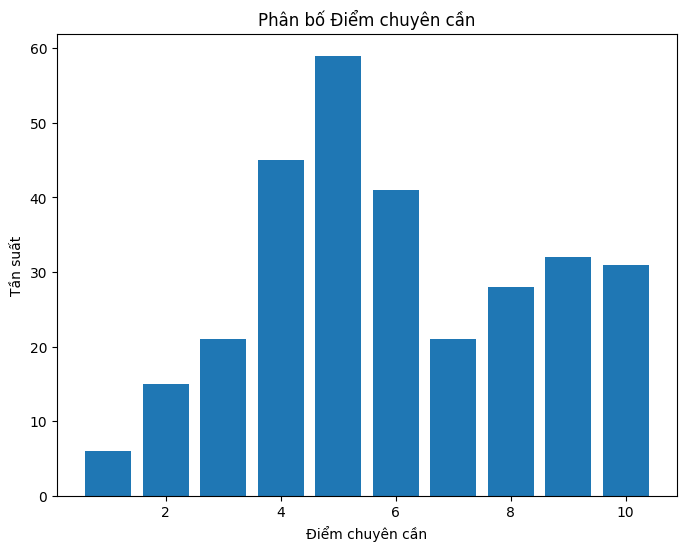

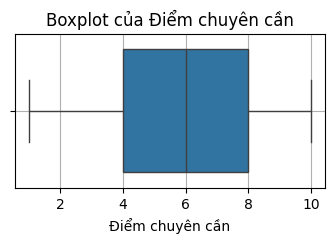

In [ ]:
# Tóm tắt thống kê cho cột 'Điểm chuyên cần'
print(df['Điểm chuyên cần'].describe())

# Vẽ histogram
counts = df['Điểm chuyên cần'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts)
plt.title('Phân bố Điểm chuyên cần')
plt.xlabel('Điểm chuyên cần')
plt.ylabel('Tần suất')
plt.show()

# Vẽ boxplot
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['Điểm chuyên cần'])
plt.title('Boxplot của Điểm chuyên cần')
plt.xlabel('Điểm chuyên cần')
plt.grid()
plt.show()

count    299.000000
mean       2.526756
std        1.382763
min        0.000000
25%        1.500000
50%        2.000000
75%        3.000000
max        7.000000
Name: Thời gian tự học (giờ/ngày), dtype: float64


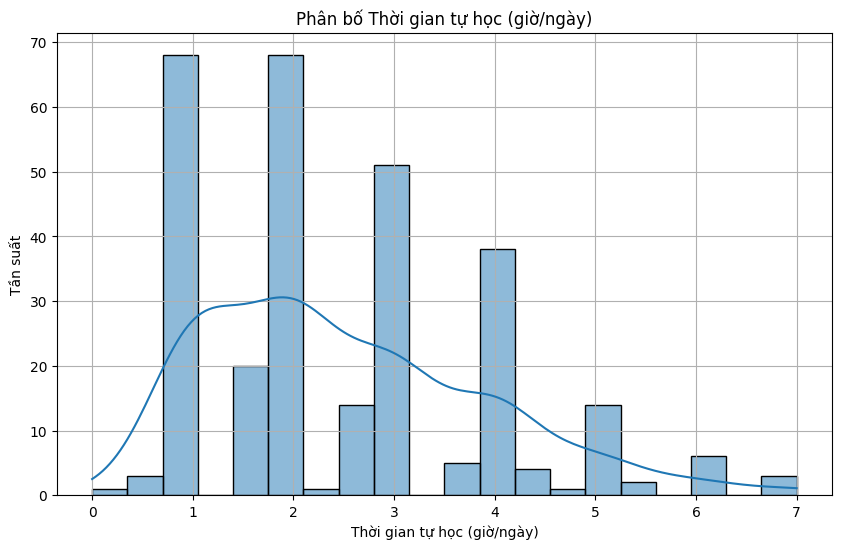

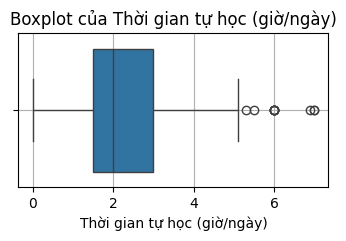

In [ ]:
# Tóm tắt thống kê cho cột 'Thời gian tự học (giờ/ngày)'
gpa_summary = df['Thời gian tự học (giờ/ngày)'].describe()
print(gpa_summary)

# Vẽ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Thời gian tự học (giờ/ngày)'], bins=20, kde=True)  # KDE cho đường cong mật độ
plt.title('Phân bố Thời gian tự học (giờ/ngày)')
plt.xlabel('Thời gian tự học (giờ/ngày)')
plt.ylabel('Tần suất')
plt.grid()
plt.show()

# Vẽ boxplot
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['Thời gian tự học (giờ/ngày)'])
plt.title('Boxplot của Thời gian tự học (giờ/ngày)')
plt.xlabel('Thời gian tự học (giờ/ngày)')
plt.grid()
plt.show()

count    299.000000
mean      65.120736
std       18.966381
min       18.000000
25%       52.000000
50%       65.000000
75%       80.000000
max      100.000000
Name: Tỷ lệ hoàn thành bài tập (%), dtype: float64


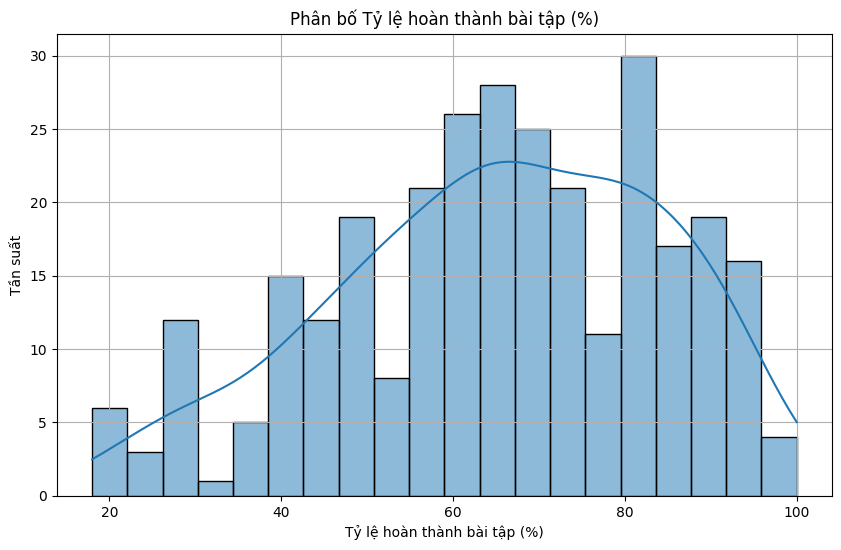

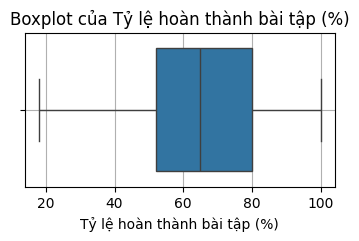

In [ ]:
# Tóm tắt thống kê cho cột 'Tỷ lệ hoàn thành bài tập (%)'
print(df['Tỷ lệ hoàn thành bài tập (%)'].describe())

# Vẽ histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Tỷ lệ hoàn thành bài tập (%)'], bins=20, kde=True)  # KDE cho đường cong mật độ
plt.title('Phân bố Tỷ lệ hoàn thành bài tập (%)')
plt.xlabel('Tỷ lệ hoàn thành bài tập (%)')
plt.ylabel('Tần suất')
plt.grid()
plt.show()

# Vẽ boxplot
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['Tỷ lệ hoàn thành bài tập (%)'])
plt.title('Boxplot của Tỷ lệ hoàn thành bài tập (%)')
plt.xlabel('Tỷ lệ hoàn thành bài tập (%)')
plt.grid()
plt.show()

Số lượng từng nhóm kết quả:
Kết quả học tập
Trung bình    117
Giỏi           93
Yếu            89


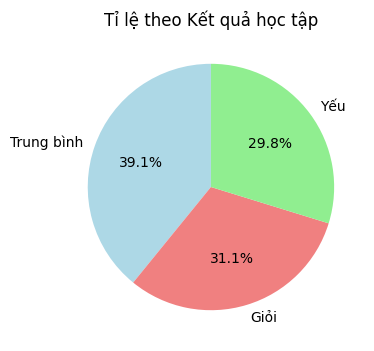

In [ ]:
# Phân tích số lượng theo Kết quả đánh giá
gender_counts = df['Kết quả học tập'].value_counts()

# In ra số lượng từng giới tính
print("Số lượng từng nhóm kết quả:")
print(gender_counts.to_string(index=True))

# Vẽ biểu đồ tròn
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Tỉ lệ theo Kết quả học tập')
plt.show()

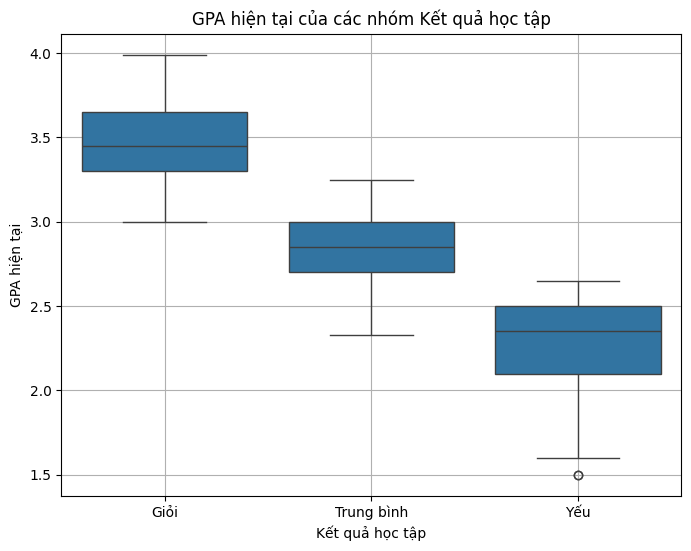

In [ ]:
# Vẽ biểu đồ boxplot thể hiện mối  Kết quả học tập theo GPA hiện tại
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kết quả học tập', y='GPA hiện tại', data=df)
plt.title('GPA hiện tại của các nhóm Kết quả học tập')
plt.xlabel('Kết quả học tập')
plt.ylabel('GPA hiện tại')
plt.grid(True)
plt.show()

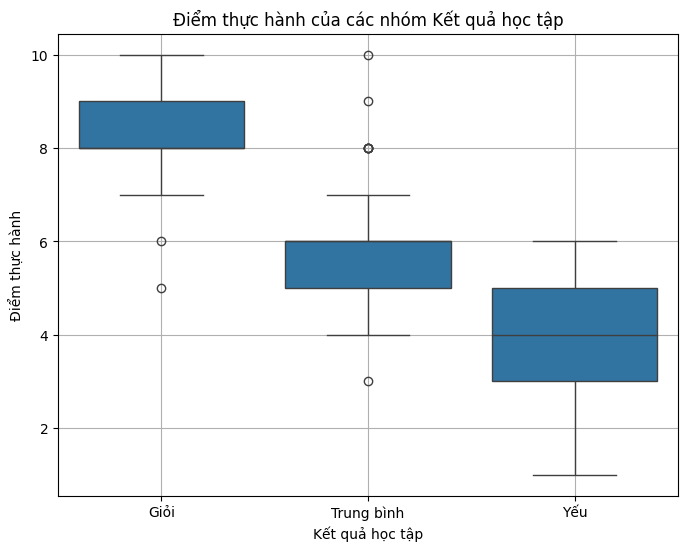

In [ ]:
# Vẽ biểu đồ boxplot thể hiện mối quan hệ Kết quả học tập theo Điểm thực hành
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kết quả học tập', y='Điểm thực hành', data=df)
plt.title('Điểm thực hành của các nhóm Kết quả học tập')
plt.xlabel('Kết quả học tập')
plt.ylabel('Điểm thực hành')
plt.grid(True)
plt.show()

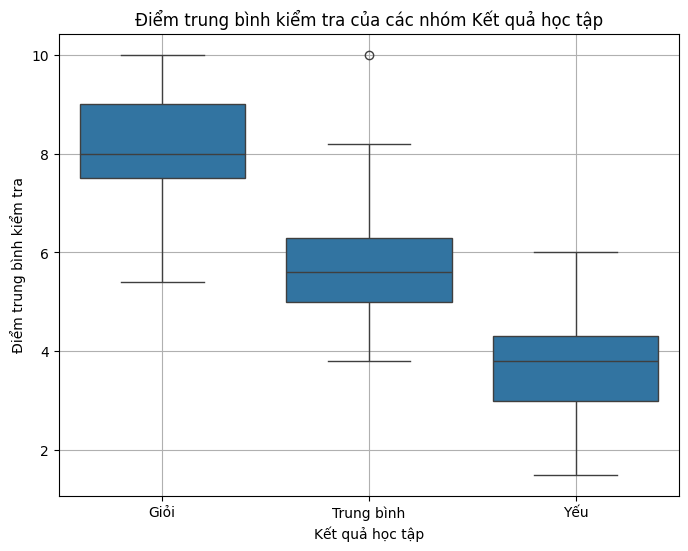

In [ ]:
# Vẽ biểu đồ boxplot thể hiện mối quan hệ Kết quả học tập theo Điểm trung bình kiểm tra
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kết quả học tập', y='Điểm trung bình kiểm tra', data=df)
plt.title('Điểm trung bình kiểm tra của các nhóm Kết quả học tập')
plt.xlabel('Kết quả học tập')
plt.ylabel('Điểm trung bình kiểm tra')
plt.grid(True)
plt.show()

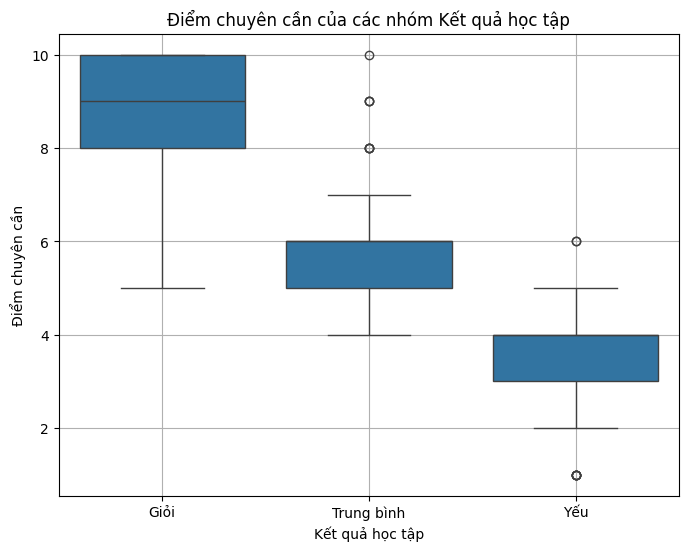

In [ ]:
# Vẽ biểu đồ boxplot thể hiện mối quan hệ Kết quả học tập theo Điểm chuyên cần
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kết quả học tập', y='Điểm chuyên cần', data=df)
plt.title('Điểm chuyên cần của các nhóm Kết quả học tập')
plt.xlabel('Kết quả học tập')
plt.ylabel('Điểm chuyên cần')
plt.grid(True)
plt.show()

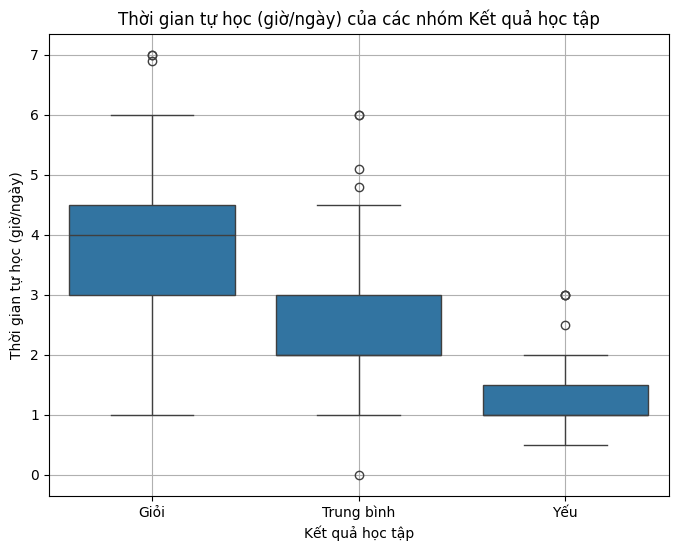

In [ ]:
# Vẽ biểu đồ boxplot thể hiện mối quan hệ Kết quả học tập theo Thời gian tự học (giờ/ngày)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kết quả học tập', y='Thời gian tự học (giờ/ngày)', data=df)
plt.title('Thời gian tự học (giờ/ngày) của các nhóm Kết quả học tập')
plt.xlabel('Kết quả học tập')
plt.ylabel('Thời gian tự học (giờ/ngày)')
plt.grid(True)
plt.show()

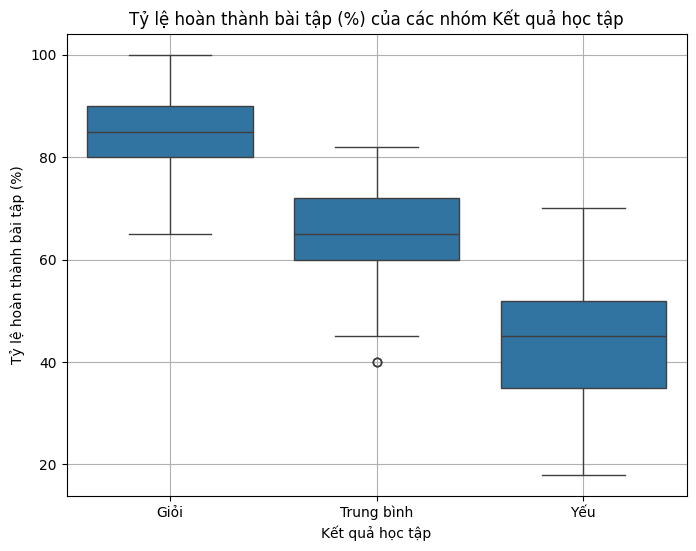

In [ ]:
# Vẽ biểu đồ boxplot thể hiện mối quan hệ Kết quả học tập theo Tỷ lệ hoàn thành bài tập (%)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kết quả học tập', y='Tỷ lệ hoàn thành bài tập (%)', data=df)
plt.title('Tỷ lệ hoàn thành bài tập (%) của các nhóm Kết quả học tập')
plt.xlabel('Kết quả học tập')
plt.ylabel('Tỷ lệ hoàn thành bài tập (%)')
plt.grid(True)
plt.show()

# Xây dựng và đánh giá model

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz

In [ ]:
# Xác định X (thuộc tính) và Y (nhãn)
X = df[['Giới tính', 'GPA hiện tại', 'Chuyên ngành', 'Điểm thực hành', 'Điểm trung bình kiểm tra',
        'Điểm chuyên cần', 'Thời gian tự học (giờ/ngày)', 'Tỷ lệ hoàn thành bài tập (%)']]
y = df['Kết quả học tập'].map({'Yếu': 0, 'Trung bình': 1, 'Giỏi': 2})

In [ ]:
X.head(1)

,Giới tính,GPA hiện tại,Chuyên ngành,Điểm thực hành,Điểm trung bình kiểm tra,Điểm chuyên cần,Thời gian tự học (giờ/ngày),Tỷ lệ hoàn thành bài tập (%)
0,1,3.99,1,10.0,10.0,10.0,2.0,100.0


In [ ]:
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Xây dựng mô hình Decision Tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model = model.fit(X_train, y_train)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

# Tính Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Tính F1 Score (trung bình macro để xem xét các nhãn lớp có số lượng dữ liệu không đồng đều)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score (macro average): {f1:.2f}")

# Đánh giá mô hình (accuracy)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
[[19  2  0]
 [ 0 20  0]
 [ 0  1 18]]
F1 Score (macro average): 0.95
Accuracy: 95.00%


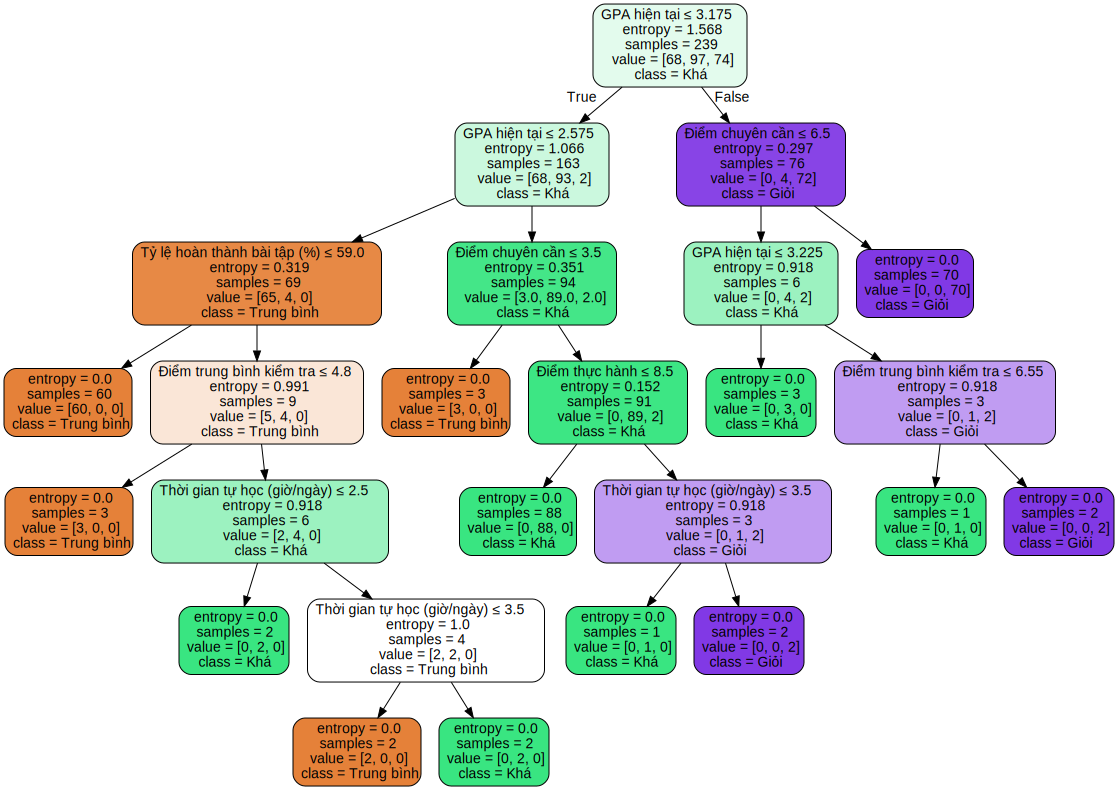

In [ ]:
# In cây quyết định
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=['Trung bình', 'Khá', 'Giỏi'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph